In [234]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import KFold 
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout,Activation,AveragePooling2D,MaxPooling2D,BatchNormalization,GlobalAveragePooling2D
import sklearn.metrics
import plotly.express as px
from conf_matrix_vis import make_confusion_matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.graph_objects as go

import os

In [196]:
dataset = np.load("../converted_dataset2.npy",allow_pickle=True)
np.random.shuffle(dataset)

test_dataset = np.load("../converted_test_dataset2.npy",allow_pickle=True)
np.random.shuffle(test_dataset)



img_row=28
img_col=28


N = np.shape(dataset)[0]
N2 = np.shape(test_dataset)[0]

x_train = dataset[:N, 0]
x_train = np.array([x.reshape(img_row, img_col, 1) for x in x_train])
y_train = dataset[:N, 1]
y_train = np.array([[x] for x in y_train])

x_test = test_dataset[:N2, 0]
x_test = np.array([x.reshape(img_row, img_col, 1) for x in x_test])
y_test = test_dataset[:N2, 1]
y_test = np.array([[x] for x in y_test])

x_train=x_train/255.0
x_test=x_test/255.0


print(len(x_train))
print(len(x_test))


95000
20000


In [260]:
labels=['Malicious','Benign']

train_ben=[x for x in y_train if x==0]
train_mal=[x for x in y_train if x==1]

dat=go.Bar(x=labels, y=[len(train_ben),len(train_mal)])
layout = go.Layout(
    title="Training/Testing Dataset",
    xaxis=dict(
        title="Traffic Types"
    ),
    yaxis=dict(
        title="Total samples"
    ) ) 


fig = go.Figure(layout=layout,data=dat)
fig.update_layout(title_text="Training/Validation Dataset", title_x=0.5)
fig.show()


In [261]:
labels=['Malicious','Benign']

train_ben=[x for x in y_test if x==0]
train_mal=[x for x in y_test if x==1]

dat=go.Bar(x=labels, y=[len(train_ben),len(train_mal)])
layout = go.Layout(
    title="Training/Testing Dataset",
    xaxis=dict(
        title="Traffic Types"
    ),
    yaxis=dict(
        title="Total samples"
    ) ) 


fig = go.Figure(layout=layout,data=dat)
fig.update_layout(title_text="Testing Dataset", title_x=0.5)
fig.show()

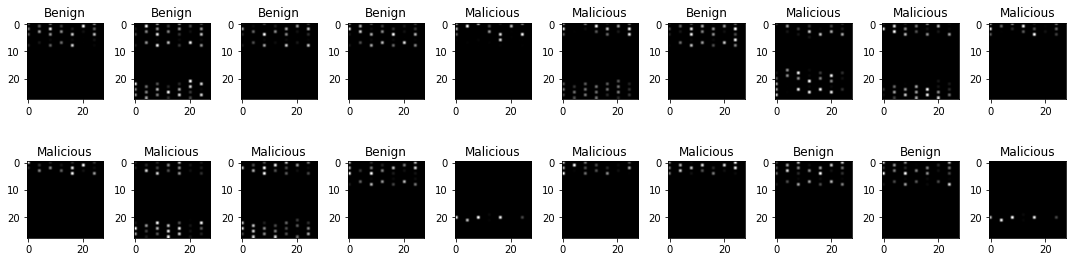

In [249]:
d={
    0:"Benign",
    1:"Malicious"
}

num_row = 2
num_col = 10
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(20):
    ax = axes[i//num_col, i%num_col]
    pixels = x_train[i].reshape((28, 28))
    ax.imshow(pixels, cmap='gray')
    ax.set_title(d[y_train[i][0]])
plt.tight_layout()
plt.show()



In [250]:
model = Sequential()
model= Sequential()
model.add(Conv2D(32,(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
          optimizer=Adam(learning_rate=0.001), 
          metrics=['accuracy'])
    

In [256]:
model.summary()

Model: "sequential_102"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_161 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_156 (MaxPoolin (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_85 (Flatten)         (None, 5408)              0         
_________________________________________________________________
dense_180 (Dense)            (None, 128)               692352    
_________________________________________________________________
dense_181 (Dense)            (None, 1)                 129       
Total params: 692,801
Trainable params: 692,801
Non-trainable params: 0
_________________________________________________________________


In [226]:
history = model.fit(x_train,y_train,
              batch_size=32,
              epochs=10,
              validation_split=0.3,
              shuffle=True,
              verbose=2)

Epoch 1/10
2079/2079 - 12s - loss: 0.0765 - accuracy: 0.9765 - val_loss: 0.0558 - val_accuracy: 0.9833
Epoch 2/10
2079/2079 - 11s - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.0440 - val_accuracy: 0.9882
Epoch 3/10
2079/2079 - 11s - loss: 0.0373 - accuracy: 0.9888 - val_loss: 0.0359 - val_accuracy: 0.9900
Epoch 4/10
2079/2079 - 11s - loss: 0.0294 - accuracy: 0.9915 - val_loss: 0.0276 - val_accuracy: 0.9926
Epoch 5/10
2079/2079 - 11s - loss: 0.0229 - accuracy: 0.9931 - val_loss: 0.0236 - val_accuracy: 0.9938
Epoch 6/10
2079/2079 - 11s - loss: 0.0186 - accuracy: 0.9946 - val_loss: 0.0214 - val_accuracy: 0.9937
Epoch 7/10
2079/2079 - 11s - loss: 0.0158 - accuracy: 0.9953 - val_loss: 0.0307 - val_accuracy: 0.9914
Epoch 8/10
2079/2079 - 11s - loss: 0.0124 - accuracy: 0.9961 - val_loss: 0.0159 - val_accuracy: 0.9960
Epoch 9/10
2079/2079 - 11s - loss: 0.0110 - accuracy: 0.9966 - val_loss: 0.0157 - val_accuracy: 0.9956
Epoch 10/10
2079/2079 - 11s - loss: 0.0089 - accuracy: 0.9972 - val_loss:

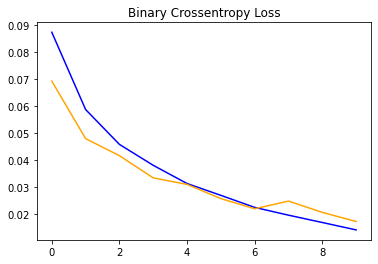

In [95]:
pyplot.title('Binary Crossentropy Loss')
pyplot.plot(history.history['loss'], color='blue', label='train')
pyplot.plot(history.history['val_loss'], color='orange', label='val')

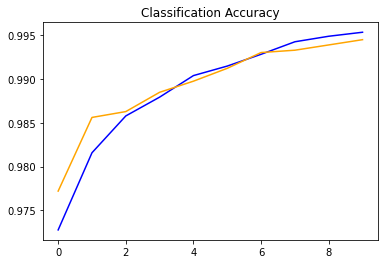

In [96]:
pyplot.title('Classification Accuracy')
pyplot.plot(history.history['accuracy'], color='blue', label='train')
pyplot.plot(history.history['val_accuracy'], color='orange', label='val')

In [227]:
predictions = model.predict(x_test)

In [228]:
rounded = [[round(x[0])] for x in predictions]

target_names = ["malicious","benign"]
print(sklearn.metrics.classification_report(y_test,rounded,labels = [1,0], target_names=target_names))

              precision    recall  f1-score   support

   malicious       0.99      0.96      0.98     10000
      benign       0.97      0.99      0.98     10000

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000



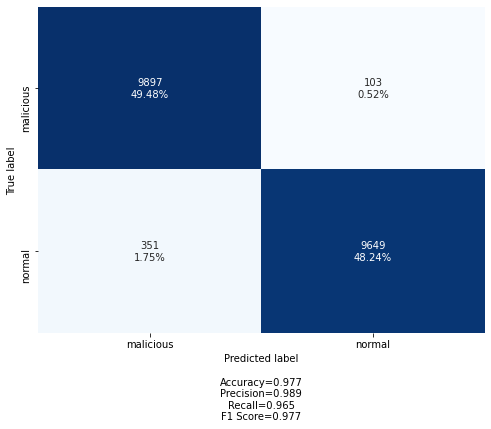

In [229]:
cf_matrix = confusion_matrix(y_test,rounded)
make_confusion_matrix(cf_matrix, figsize=(8,6),categories=["malicious","normal"], cbar=False)

In [ ]:
#Precision=TP/(TP+FP) ratio of correctly predicted as attacks to all samples predicted as attacks
#Recall=DetectionRate=TP/(TP+FN) ratio of correctly predicted as attacks to all samples that are actually attacks
#FalseAlarmRate=FP/(FP+TN) ratio of incorrectly predicted samples as attacks to all samples that are actually bening
#TrueNegativeRate=TN/(TN+FP) ratio of correctly predicted as benign to all samples predicted as benign

In [113]:
#How many convolutional layers/pooling pairs

nets = 3
model = [0] *nets

for j in range(3):
    model[j] = Sequential()
    model[j].add(Conv2D(32,(3, 3),padding='same',activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPooling2D((2, 2)))
    if j>0:
        model[j].add(Conv2D(64,(3, 3),padding='same',activation='relu'))
        model[j].add(MaxPooling2D((2, 2)))
    if j>1:
        model[j].add(Conv2D(128,(3, 3),padding='same',activation='relu'))
        model[j].add(MaxPooling2D((2, 2)))
    model[j].add(Flatten())
    model[j].add(Dense(128, activation='relu'))
    model[j].add(Dense(1, activation='sigmoid'))
    model[j].compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [121]:
history = [0] * nets
names = ["Conv/Pool-1pairs","Conv/Pool-2pairs","Conv/Pool-3pairs"]
ep=10
for j in range(nets):
    history[j] = model[j].fit(x_train,y_train,
              batch_size=32,
              epochs=ep,
              validation_split=0.3,
              shuffle=True,
              verbose=0)

CNN Conv/Pool-1pairs: Epochs=10, Train accuracy=0.99860, Validation accuracy=0.99407
CNN Conv/Pool-2pairs: Epochs=10, Train accuracy=0.99931, Validation accuracy=0.99593
CNN Conv/Pool-3pairs: Epochs=10, Train accuracy=0.99957, Validation accuracy=0.99473


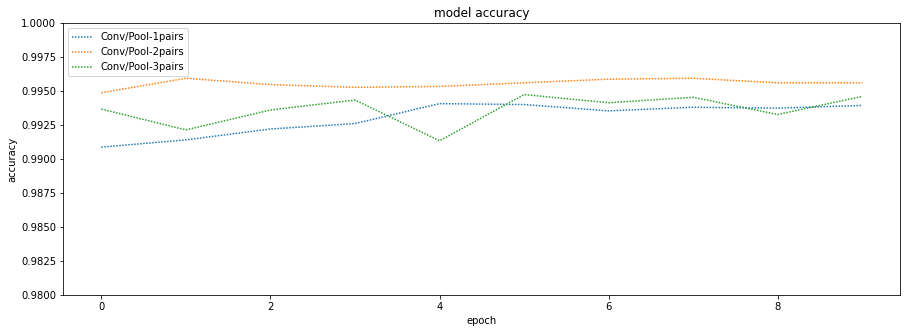

In [122]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=(0, (1, 1)))
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

In [124]:
nets = 6
model = [0] *nets
for j in range(6):
    model[j] = Sequential()
    model[j].add(Conv2D(j*8+8,(3, 3),activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPooling2D((2, 2)))
    model[j].add(Conv2D(j*16+16,(3, 3),activation='relu'))
    model[j].add(MaxPooling2D((2, 2)))
    model[j].add(Flatten())
    model[j].add(Dense(128, activation='relu'))
    model[j].add(Dense(1, activation='sigmoid'))
    model[j].compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [130]:
#How many maps
history = [0] * nets
names = ["8 maps","16 maps","24 maps","32 maps","48 maps","64 maps"]
ep=10
for j in range(nets):
    history[j] = model[j].fit(x_train,y_train,
              batch_size=32,
              epochs=ep,
              validation_split=0.3,
              shuffle=True,
              verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],ep,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))


CNN 8 maps: Epochs=10, Train accuracy=0.99066, Validation accuracy=0.99033
CNN 16 maps: Epochs=10, Train accuracy=0.99349, Validation accuracy=0.99167
CNN 24 maps: Epochs=10, Train accuracy=0.99363, Validation accuracy=0.99320
CNN 32 maps: Epochs=10, Train accuracy=0.99471, Validation accuracy=0.99487
CNN 48 maps: Epochs=10, Train accuracy=0.99503, Validation accuracy=0.99160
CNN 64 maps: Epochs=10, Train accuracy=0.99497, Validation accuracy=0.99267


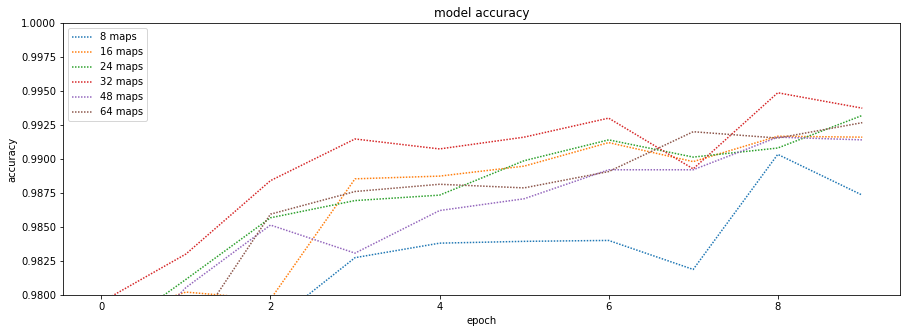

In [131]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=(0, (1, 1)))
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

In [40]:
nets = 8
model = [0] *nets

for j in range(8):
    model[j] = Sequential()
    model[j].add(Conv2D(24,(3, 3),activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPooling2D((2, 2)))
    model[j].add(Conv2D(48,(3, 3),activation='relu'))
    model[j].add(MaxPooling2D((2, 2)))
    model[j].add(Flatten())
    if j>0:
        model[j].add(Dense(2**(j+4), activation='relu'))
    model[j].add(Dense(1, activation='sigmoid'))
    model[j].compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [48]:
history = [0] * nets
names = ["16Neurons","32Neurons","64Neurons","128Neurons","256Neurons","512Neurons"]
ep = 10
for j in range(nets):
    history[j] = model[j].fit(x_train,y_train,
              batch_size=32,
              epochs=ep,
              validation_split=0.3,
              shuffle=True,
              verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],ep,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))

CNN 16Neurons: Epochs=10, Train accuracy=0.99613, Validation accuracy=0.99584
CNN 32Neurons: Epochs=10, Train accuracy=0.99791, Validation accuracy=0.99626
CNN 64Neurons: Epochs=10, Train accuracy=0.99837, Validation accuracy=0.99679
CNN 128Neurons: Epochs=10, Train accuracy=0.99896, Validation accuracy=0.99721
CNN 256Neurons: Epochs=10, Train accuracy=0.99846, Validation accuracy=0.99689
CNN 512Neurons: Epochs=10, Train accuracy=0.99900, Validation accuracy=0.99737


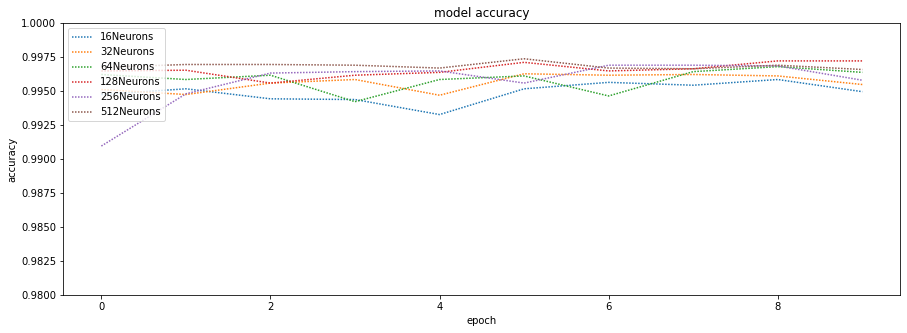

In [49]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=(0, (1, 1)))
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

In [158]:
#Dropout
nets = 5
model = [0] *nets

for j in range(nets):
    model[j] = Sequential()
    model[j].add(Conv2D(32,(3, 3),activation='relu',input_shape=(28,28,1)))
    model[j].add(MaxPooling2D((2, 2)))
    model[j].add(Dropout(j*0.1))
    model[j].add(Conv2D(64,(3, 3),activation='relu'))
    model[j].add(MaxPooling2D((2, 2)))
    model[j].add(Flatten())
    model[j].add(Dense(128, activation='relu'))
    model[j].add(Dense(1, activation='sigmoid'))
    model[j].compile(optimizer=Adam(learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [161]:
history = [0] * nets
names = ["Dropout0%","Dropout10%","Dropout20%","Dropout30%","Dropout40%"]
ep = 10
for j in range(nets):
    history[j] = model[j].fit(x_train,y_train,
              batch_size=32,
              epochs=ep,
              validation_split=0.3,
              shuffle=True,
              verbose=0)
    print("CNN {0}: Epochs={1:d}, Train accuracy={2:.5f}, Validation accuracy={3:.5f}".format(
        names[j],ep,max(history[j].history['accuracy']),max(history[j].history['val_accuracy']) ))


CNN Dropout0%: Epochs=10, Train accuracy=0.99471, Validation accuracy=0.99373
CNN Dropout10%: Epochs=10, Train accuracy=0.99403, Validation accuracy=0.99587
CNN Dropout20%: Epochs=10, Train accuracy=0.99271, Validation accuracy=0.99227
CNN Dropout30%: Epochs=10, Train accuracy=0.99080, Validation accuracy=0.99173
CNN Dropout40%: Epochs=10, Train accuracy=0.99129, Validation accuracy=0.99253


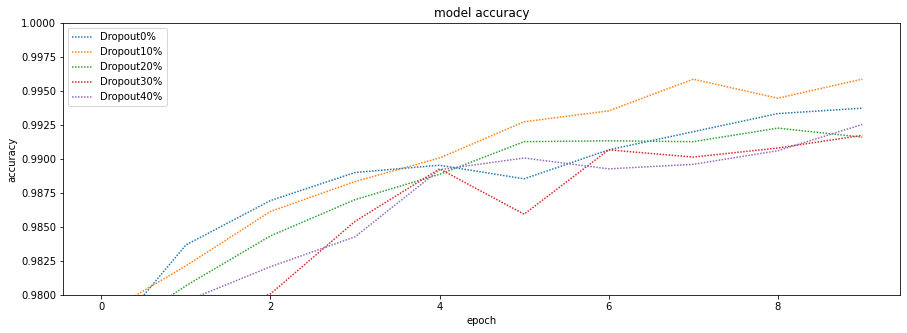

In [162]:
plt.figure(figsize=(15,5))
for i in range(nets):
    plt.plot(history[i].history['val_accuracy'],linestyle=(0, (1, 1)))
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(names, loc='upper left')
axes = plt.gca()
axes.set_ylim([0.98,1])
plt.show()

In [257]:
model= Sequential()
model.add(Conv2D(32,(3, 3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.1))
model.add(Conv2D(64,(3, 3),activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))



In [258]:
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001), 
              metrics=['accuracy'])


In [259]:
model.summary()

Model: "sequential_103"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_162 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_157 (MaxPoolin (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_163 (Conv2D)          (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_158 (MaxPoolin (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_86 (Flatten)         (None, 1600)              0         
_________________________________________________________________
dense_182 (Dense)            (None, 128)            

In [204]:
history = model.fit(x_train,y_train,
              batch_size=32,
              epochs=10,
              validation_split=0.3,
              shuffle=True,
              verbose=2)

Epoch 1/10
2079/2079 - 20s - loss: 0.0773 - accuracy: 0.9760 - val_loss: 0.0600 - val_accuracy: 0.9813
Epoch 2/10
2079/2079 - 19s - loss: 0.0457 - accuracy: 0.9848 - val_loss: 0.0440 - val_accuracy: 0.9858
Epoch 3/10
2079/2079 - 19s - loss: 0.0322 - accuracy: 0.9891 - val_loss: 0.0296 - val_accuracy: 0.9900
Epoch 4/10
2079/2079 - 19s - loss: 0.0255 - accuracy: 0.9915 - val_loss: 0.0242 - val_accuracy: 0.9921
Epoch 5/10
2079/2079 - 19s - loss: 0.0211 - accuracy: 0.9930 - val_loss: 0.0217 - val_accuracy: 0.9936
Epoch 6/10
2079/2079 - 19s - loss: 0.0187 - accuracy: 0.9938 - val_loss: 0.0193 - val_accuracy: 0.9946
Epoch 7/10
2079/2079 - 19s - loss: 0.0158 - accuracy: 0.9948 - val_loss: 0.0223 - val_accuracy: 0.9938
Epoch 8/10
2079/2079 - 19s - loss: 0.0144 - accuracy: 0.9954 - val_loss: 0.0196 - val_accuracy: 0.9939
Epoch 9/10
2079/2079 - 19s - loss: 0.0125 - accuracy: 0.9958 - val_loss: 0.0190 - val_accuracy: 0.9939
Epoch 10/10
2079/2079 - 19s - loss: 0.0112 - accuracy: 0.9964 - val_loss:

In [206]:
predictions = model.predict(x_test)

In [207]:
rounded = [[round(x[0])] for x in predictions]

target_names = ["malicious","benign"]
print(sklearn.metrics.classification_report(y_test,rounded,labels = [1,0], target_names=target_names))

              precision    recall  f1-score   support

   malicious       0.99      0.96      0.98     10000
      benign       0.96      0.99      0.98     10000

    accuracy                           0.98     20000
   macro avg       0.98      0.98      0.98     20000
weighted avg       0.98      0.98      0.98     20000



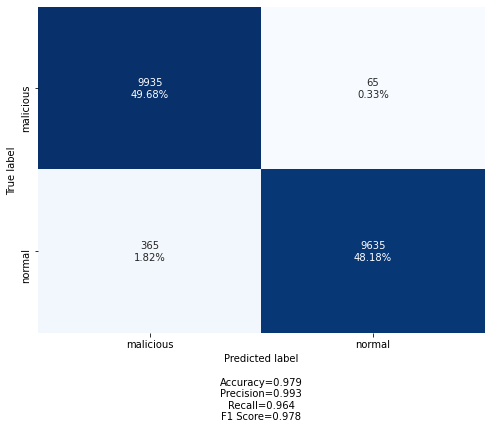

In [208]:
cf_matrix = confusion_matrix(y_test,rounded)
make_confusion_matrix(cf_matrix, figsize=(8,6),categories=["malicious","normal"], cbar=False)